In [9]:
!pip install -q datasets transformers evaluate peft trl bitsandbytes accelerate
!pip install --upgrade -q accelerate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


9436


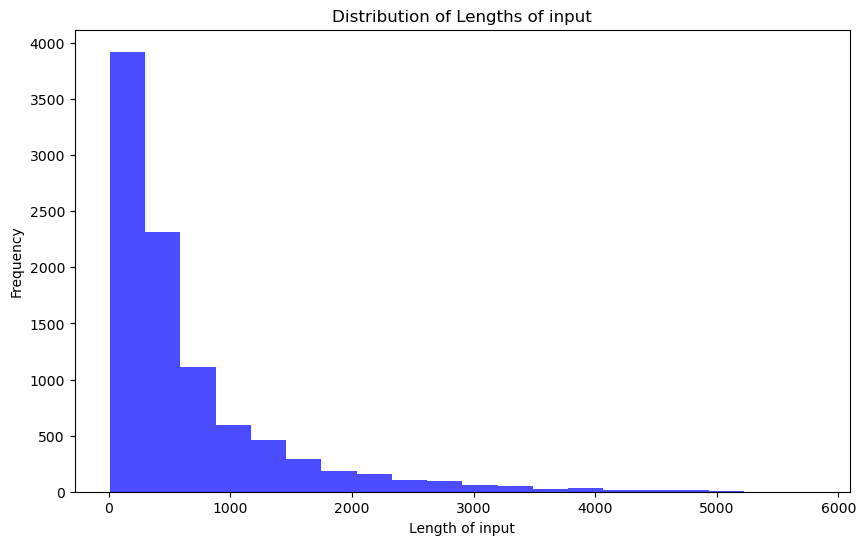

In [3]:
import matplotlib.pyplot as plt
from datasets import load_from_disk

dataset = load_from_disk("../datasets/survey_json_datasets")
train_dataset, test_dataset = dataset.train_test_split(test_size=0.2).values()
_, eval_dataset = test_dataset.train_test_split(test_size=0.2).values()

def formatting_func(example):
    text = f"### USER:\nConvert the question list to survey json.\n{example['data'][0]}\n### ASSISTANT: {example['data'][1]}"
    return text

def plot_data_lengths(train_dataset, test_dataset):
    lengths = [len(x['data'][0]) for x in train_dataset]
    lengths += [len(x['data'][0]) for x in test_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input')
    plt.show()

plot_data_lengths(train_dataset, test_dataset)

9436


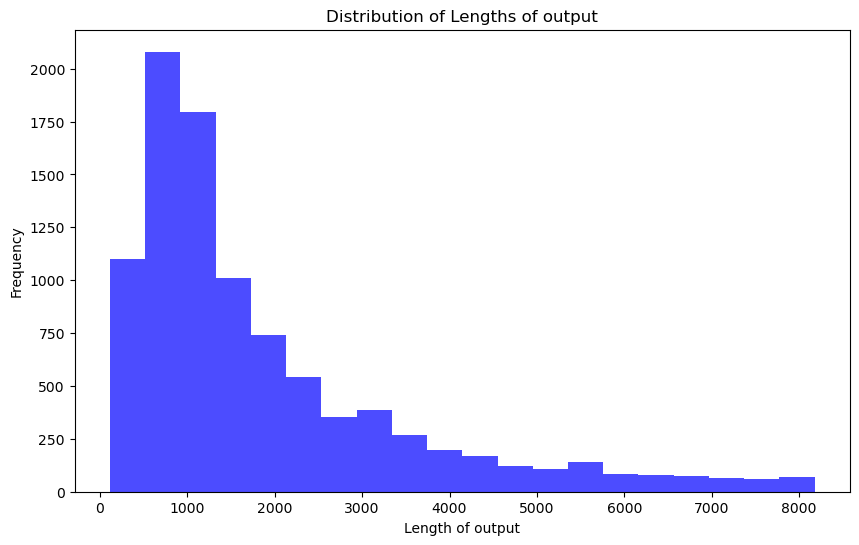

In [4]:
def plot_data_lengths(train_dataset, test_dataset):
    lengths = [len(x['data'][1]) for x in train_dataset]
    lengths += [len(x['data'][1]) for x in test_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of output')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of output')
    plt.show()

plot_data_lengths(train_dataset, test_dataset)